#                                        Predict Survival on Titanic 

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("Titanic.csv")

In [5]:
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   survived                   891 non-null    int64  
 1   pclass                     891 non-null    int64  
 2   age                        891 non-null    float64
 3   sibsp                      891 non-null    int64  
 4   parch                      891 non-null    int64  
 5   fare                       891 non-null    float64
 6   male                       891 non-null    int64  
 7   age_was_missing            891 non-null    bool   
 8   embarked_from_cherbourg    891 non-null    int64  
 9   embarked_from_queenstown   891 non-null    int64  
 10  embarked_from_southampton  891 non-null    int64  
dtypes: bool(1), float64(2), int64(8)
memory usage: 70.6 KB


In [7]:
df.shape

(891, 11)

# dropping unecessary columns

In [8]:
df=df.drop("age_was_missing",axis=1)

In [9]:
df=df.drop("embarked_from_cherbourg",axis=1)

In [10]:
df.head()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Improving using Dimensionality Reduction

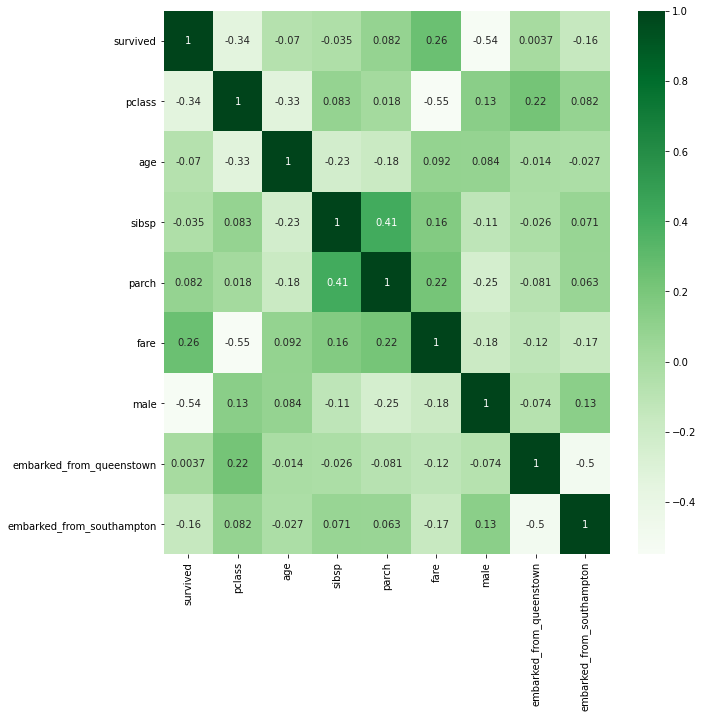

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Greens") 

since there is no value above than 0.8 thus we won't drop any column

# Univariate Analysis

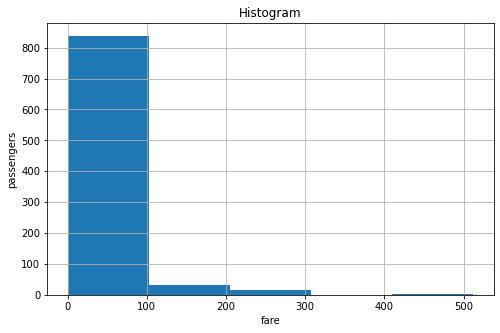

In [12]:
plt.figure(figsize=(8,5))
plt.hist(df['fare'],bins=5)
plt.title("Histogram")
plt.ylabel("passengers")
plt.xlabel("fare")
plt.grid(True)

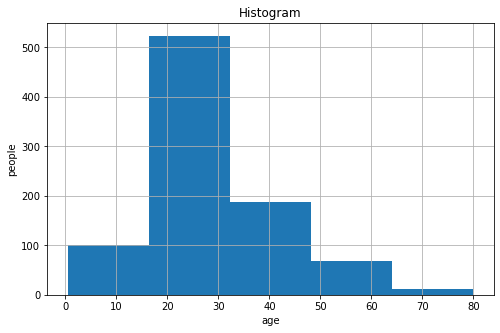

In [13]:
plt.figure(figsize=(8,5))
plt.hist(df['age'],bins=5)
plt.title("Histogram")
plt.ylabel("people")
plt.xlabel("age")
plt.grid(True)

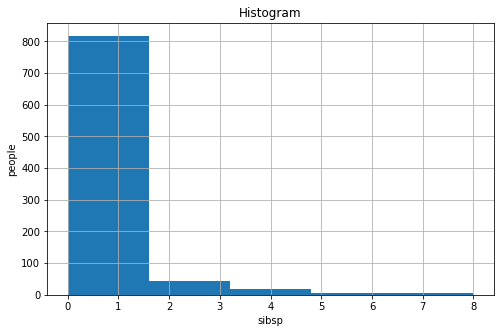

In [14]:
plt.figure(figsize=(8,5))
plt.hist(df['sibsp'],bins=5)
plt.title("Histogram")
plt.ylabel("people")
plt.xlabel("sibsp")
plt.grid(True)

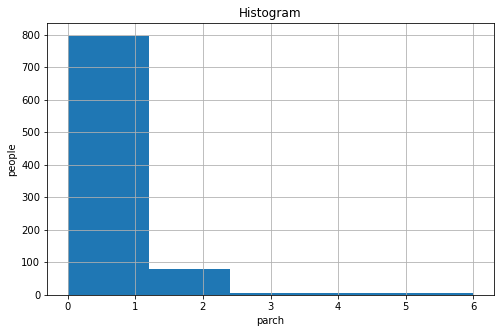

In [15]:
plt.figure(figsize=(8,5))
plt.hist(df['parch'],bins=5)
plt.title("Histogram")
plt.xlabel("parch")
plt.ylabel("people")
plt.grid(True)

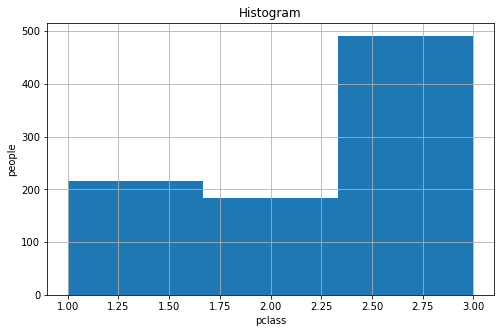

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df['pclass'],bins=3)
plt.title("Histogram")
plt.ylabel("people")
plt.xlabel("pclass")
plt.grid(True)

# Boxplot

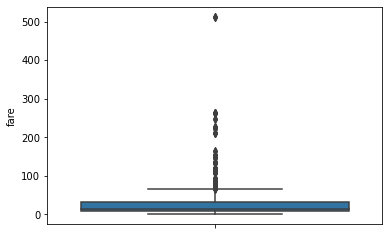

In [17]:
sns.boxplot(y = 'fare',data = df)

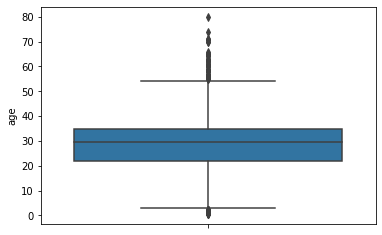

In [18]:
sns.boxplot(y = 'age',data = df)

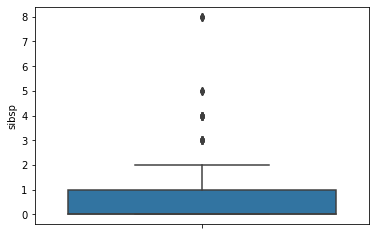

In [19]:
sns.boxplot(y = 'sibsp',data = df)

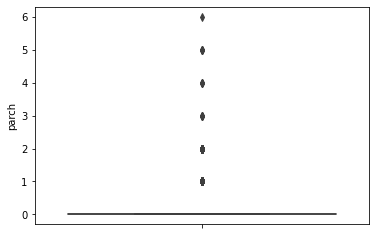

In [20]:
sns.boxplot(y = 'parch',data = df)

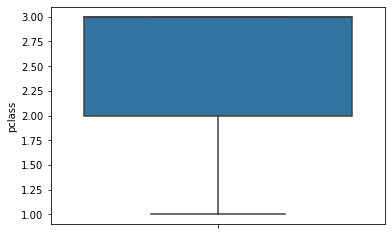

In [21]:
sns.boxplot(y = 'pclass',data = df)

In [ ]:
sns.boxplot(y = '',data = df)

# Bivariate Analysis

Text(0, 0.5, 'fare')

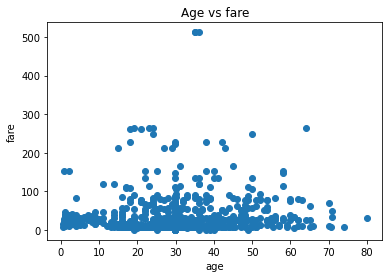

In [22]:
plt.scatter(df['age'],df['fare'])
plt.title("Age vs fare")
plt.xlabel("age")
plt.ylabel("fare")

Text(0, 0.5, 'fare')

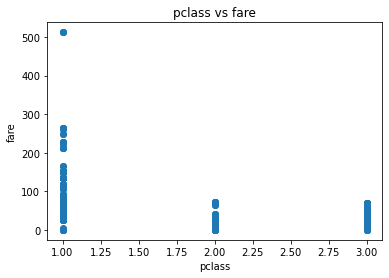

In [23]:
plt.scatter(df['pclass'],df['fare'])
plt.title("pclass vs fare")
plt.xlabel("pclass")
plt.ylabel("fare")

Text(0, 0.5, 'sibsp')

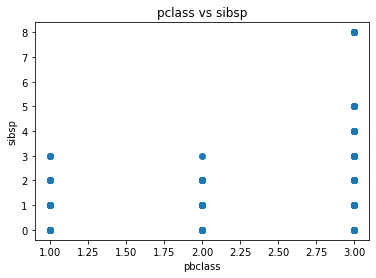

In [24]:
plt.scatter(df['pclass'],df['sibsp'])
plt.title("pclass vs sibsp")
plt.xlabel("pbclass")
plt.ylabel("sibsp")

Text(0, 0.5, 'parch')

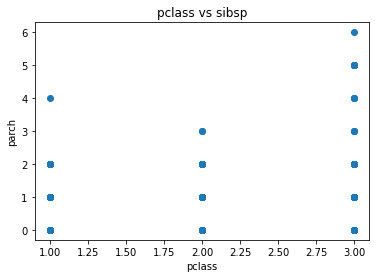

In [25]:
plt.scatter(df['pclass'],df['parch'])
plt.title("pclass vs sibsp")
plt.xlabel("pclass")
plt.ylabel("parch")

Text(0, 0.5, 'age')

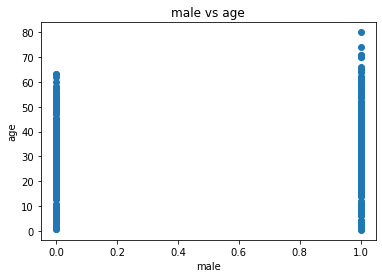

In [26]:
plt.scatter(df['male'],df['age'])
plt.title("male vs age")
plt.xlabel("male")
plt.ylabel("age")

# Extraction

In [27]:
X=df.drop("survived",axis=1)

In [28]:
type(X)

pandas.core.frame.DataFrame

In [29]:
X.shape

(891, 8)

In [30]:
y=df["survived"]

In [31]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
stdscale=StandardScaler()

In [34]:
X=stdscale.fit_transform(X)

In [35]:
print(X)

[[ 8.27377244e-01 -5.92480600e-01  4.32793366e-01 ...  7.37695132e-01
  -3.07562343e-01  6.19306364e-01]
 [-1.56610693e+00  6.38789012e-01  4.32793366e-01 ... -1.35557354e+00
  -3.07562343e-01 -1.61470971e+00]
 [ 8.27377244e-01 -2.84663197e-01 -4.74545196e-01 ... -1.35557354e+00
  -3.07562343e-01  6.19306364e-01]
 ...
 [ 8.27377244e-01  1.81374154e-10  4.32793366e-01 ... -1.35557354e+00
  -3.07562343e-01  6.19306364e-01]
 [-1.56610693e+00 -2.84663197e-01 -4.74545196e-01 ...  7.37695132e-01
  -3.07562343e-01 -1.61470971e+00]
 [ 8.27377244e-01  1.77062908e-01 -4.74545196e-01 ...  7.37695132e-01
   3.25137334e+00 -1.61470971e+00]]


# Splitting

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42,stratify = y)


# Training through KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn=KNeighborsClassifier()

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
knn.score(X_test,y_test)

0.8268156424581006

In [42]:
y_pred=knn.predict(X_test)

In [43]:
print(y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0
 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0]


# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logisticsRegr=LogisticRegression()

In [46]:
logisticsRegr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
logisticsRegr.score(X_test,y_test)

0.8044692737430168

In [48]:
y_pred=logisticsRegr.predict(X_test)

In [49]:
print(y_pred)

[0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0]


# Decsion Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
clf = DecisionTreeClassifier()

In [52]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
clf.score(X_test,y_test)

0.8100558659217877

In [54]:
y_pred=clf.predict(X_test)

In [55]:
print(y_pred)

[0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1
 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1
 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0]


# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
ranforest=RandomForestClassifier()

In [58]:
ranforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
ranforest.score(X_test,y_test)

0.8212290502793296

In [60]:
y_pred=ranforest.predict(X_test)

In [61]:
print(y_pred)

[0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0]
